In [14]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tnrange
import pandas

In [15]:
import soapy
import aotools

In [16]:
CONFIGFILE = "conf/simulation/temporalerror.yaml"

In [17]:
FRAME_TIMES = (1./numpy.array([100, 200, 400, 500, 600, 800, 1000]))
INTEGRATION_TIME = 10 #seconds
WIND_SPEEDS = [5, 10, 20, 40]
RUNS = 1
TEL_DIAM = 8.
R0 = 0.20
WAVELENGTH = 500e-9

In [ ]:
data_frame = pandas.DataFrame()

for r in tnrange(RUNS):
    for nw in tnrange(len(WIND_SPEEDS)):
        for nf in range(len(FRAME_TIMES)):

            total_frames = int(INTEGRATION_TIME / FRAME_TIMES[nf])
            print('\n***\nSet Wind speed to {}m/s, loop time to {}ms"\n***'.format(WIND_SPEEDS[nw], 1000*FRAME_TIMES[nf]))
            print("Run for {} frames".format(total_frames))
            
            sim = soapy.Sim(CONFIGFILE)
            sim.config.sim.nIters=total_frames

            sim.config.sim.loopTime = FRAME_TIMES[nf]
            sim.config.atmos.windSpeeds[0] = WIND_SPEEDS[nw]
            
            sim.aoinit()
            sim.makeIMat()
            sim.aoloop()

            data_series = pandas.Series(dict(sim.config.sim.saveHeader))
            data_series["wind_speed"] = WIND_SPEEDS[nw]
            data_series["loop_time"] = FRAME_TIMES[nf]
            
            data_series["long_strehl"] = sim.longStrehl[0][-1]
            data_series["wavefront_error"] = sim.WFE[0][-1]
            
            
            data_frame = data_frame.append(data_series, ignore_index=True)


***
Set Wind speed to 5m/s, loop time to 10.0ms"
***
Run for 1000 frames
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
1 of 1: Loaded configuration file successfully!Starting Sim: 2017-05-19-16-13-49
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
Creating mask...
Turbulence summary @ 500 nm:
| r0 = 0.20 m (0.52" seeing)
| Vbar_5/3 = 5.00 m/s
| tau0 = 12.56 ms
Initialise Infinite Phase Screen 1
Initialising WFSs....
WFS 0: 632 measurements
Initialising 1 DMs...
Making DM Influence Functions...
DM 0: 441 active actuators
441 total DM Actuators
Initialising Reconstructor...
Initialising 1 Science Cams...
Generating fftw3 plan....
If this takes too long, change fftw_FLAGS.
Done!
Initialise Data Storage...
Initialisation Complete!
Making interaction Matrices...
Creating Interaction Matrix for DM 0 
141 of 441: Generating 441 Actuator DM iMat
440 of 441: Generating 441 Actuator DM iMat
441 of 441: Generating 441 Actuator DM iMatChecking for redundant actuato

440 of 441: Generating 441 Actuator DM iMat
441 of 441: Generating 441 Actuator DM iMatChecking for redundant actuators...
DM 0 has 429 valid actuators (12 dropped)
Interaction Matrices Done
Creating Command Matrix
Invert iMat with conditioning: 0.0300
Command Matrix Generated!
7999 of 8000: temporalerror  Strehl -- sci_0: inst 0.93, long 0.90 
8000 of 8000: temporalerror  Strehl -- sci_0: inst 0.93, long 0.90 

Science Camera 0: Long Exposure Strehl Ratio: 0.90


Time moving atmosphere: 0.00
Time making IMats and CMats: 11.55
Time in WFS: 177.05
	 of which time spent in : 0.00
Time in Reconstruction: 1.65
Time in DM: 5.07
Time making science image: 18.59



***
Set Wind speed to 5m/s, loop time to 1.0ms"
***
Run for 10000 frames
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
1 of 1: Loaded configuration file successfully!Starting Sim: 2017-05-19-16-27-32
Pixel Scale: 12.50 pxls/m
subScreenSize: 102 simulation pixels
Creating mask...
Turbulence summary @ 500 nm:
| r0 = 

In [ ]:
data_frame

In [ ]:
fig = pyplot.figure()
for ws in WIND_SPEEDS:
    df = data_frame[data_frame.wind_speed==ws]
    pyplot.plot(df.loop_time, df.long_strehl, label="Wind Speed: {}".format(ws))
    
    pyplot.legend()

<IPython.core.display.Javascript object>


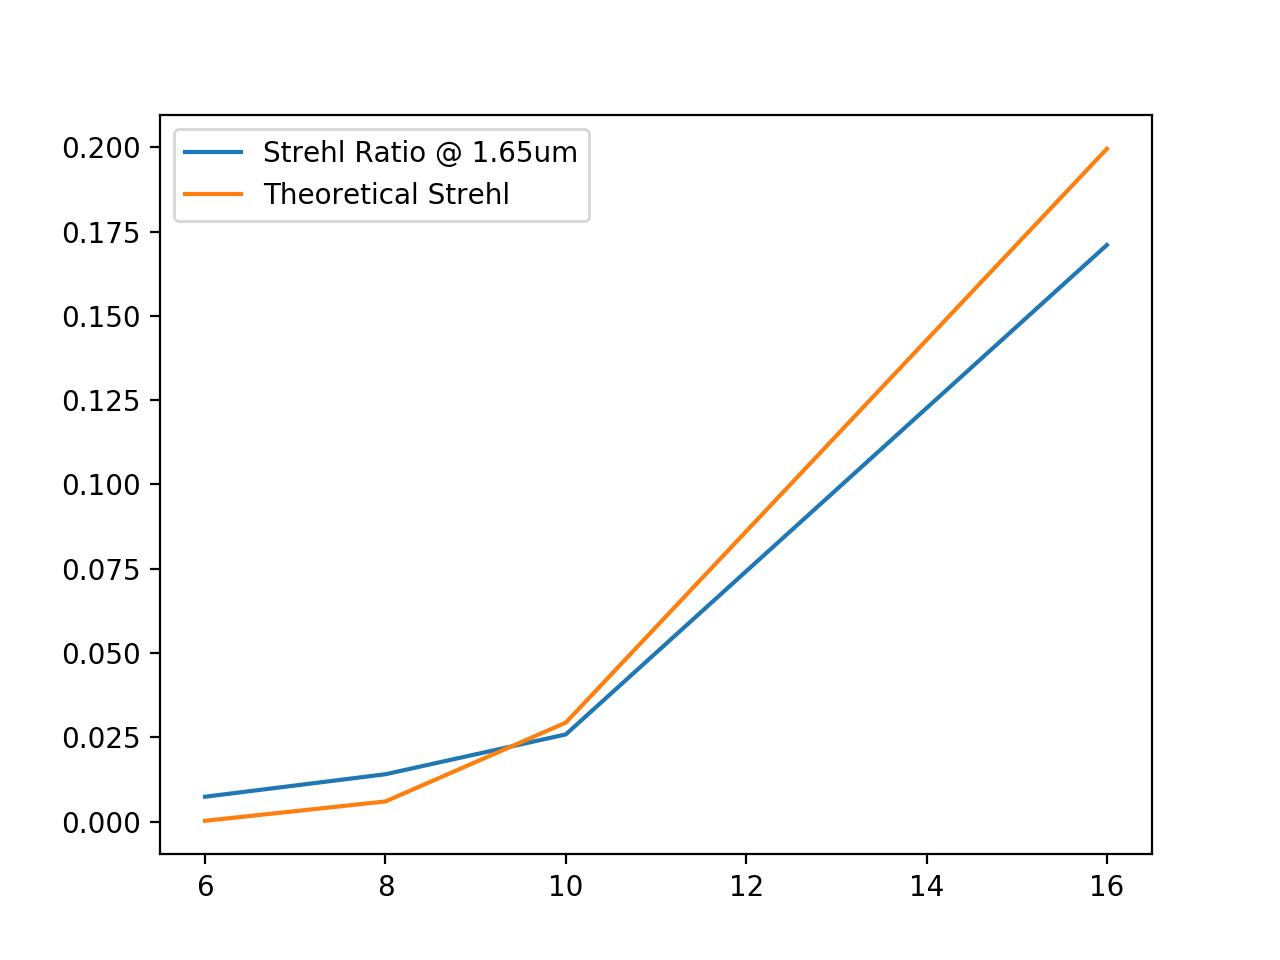

In [169]:
fig = pyplot.figure()
pyplot.plot(N_SUBAPS[:n-1], strehls.T[:n-1], label="Strehl Ratio @ 1.65um")
pyplot.plot(N_SUBAPS[:n-1], theoretical_strehl[:n-1], label="Theoretical Strehl")
# pyplot.plot(N_SUBAPS, wfe.T, label="Wavefront Error")
pyplot.legend()

In [170]:
measured_wfe = numpy.sqrt(-1 * numpy.log(strehls[:,:n-1])) * (1650 / (2*numpy.pi))
print(measured_wfe)

[[ 581.70265574  542.27144355  502.01775669  348.97719574]]


<IPython.core.display.Javascript object>


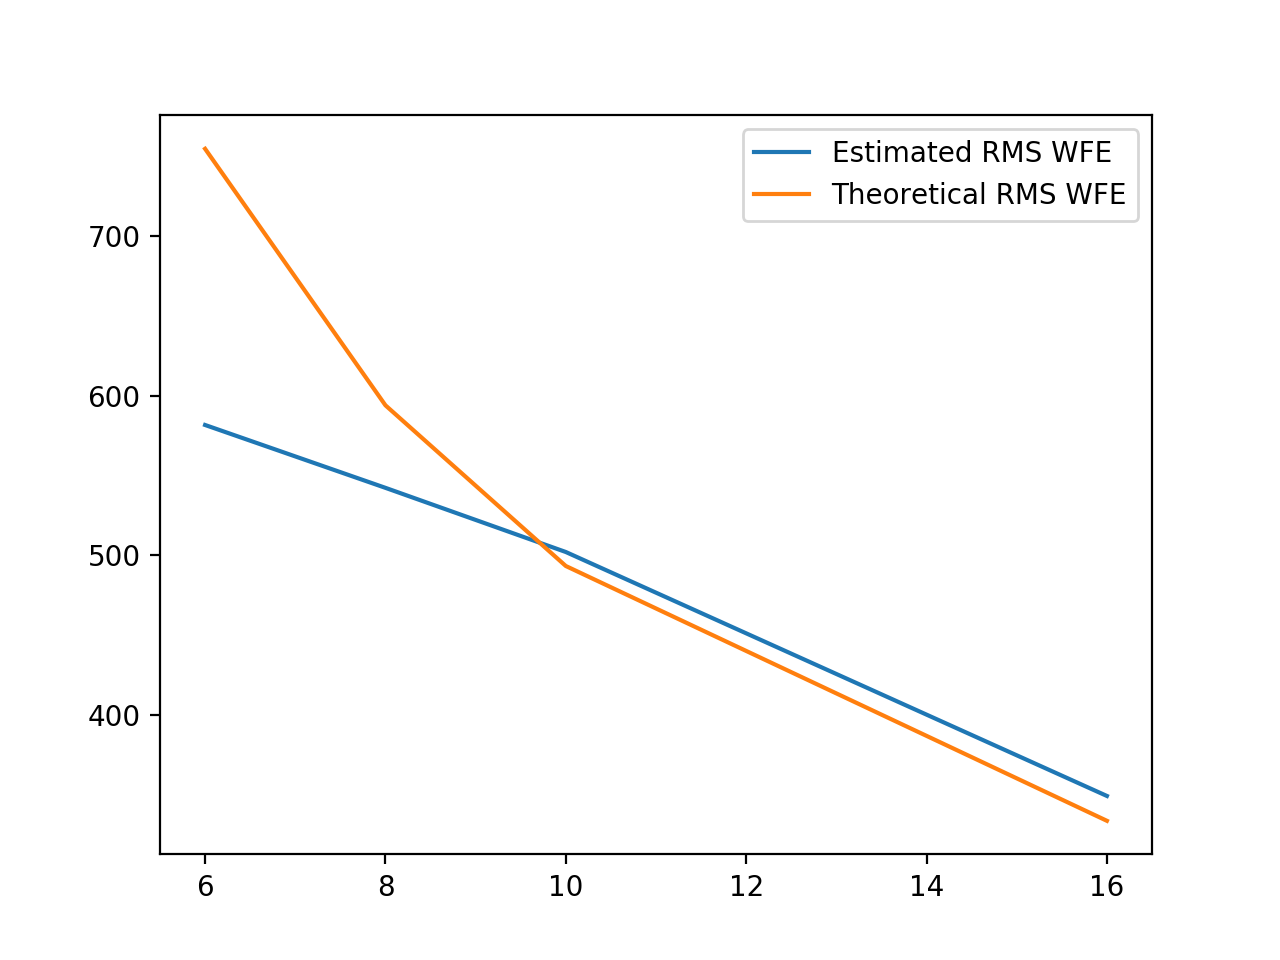

In [171]:
fig = pyplot.figure()
pyplot.plot(N_SUBAPS[:n-1], measured_wfe.T[:n-1], label="Estimated RMS WFE")
pyplot.plot(N_SUBAPS[:n-1], theoretical_wfe[:n-1], label="Theoretical RMS WFE")
# pyplot.plot(N_SUBAPS, wfe.T, label="Wavefront Error")
pyplot.legend()

<IPython.core.display.Javascript object>


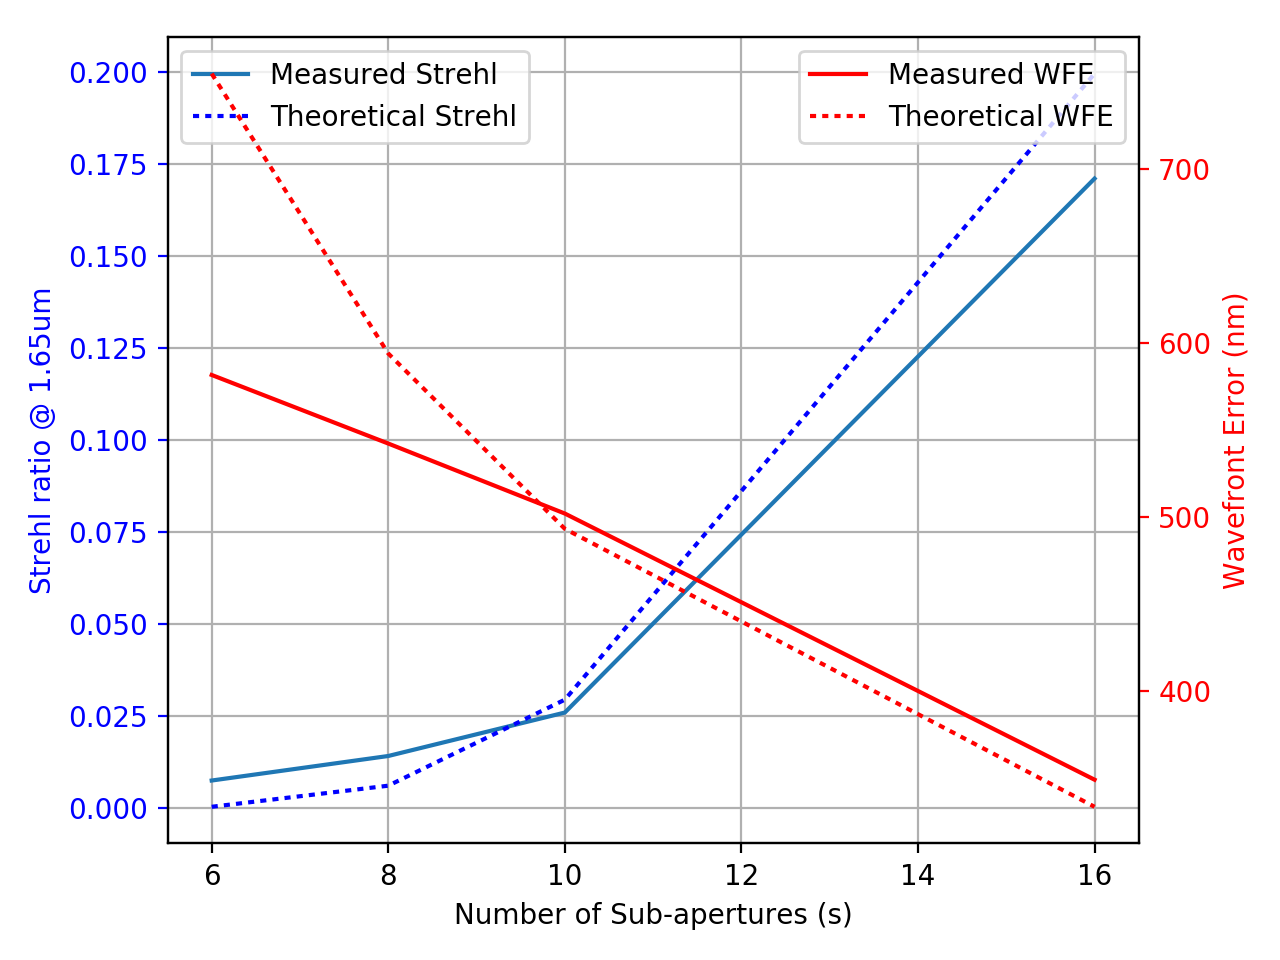

In [172]:
fig, ax1 = pyplot.subplots()
pyplot.grid()

ax1.plot(N_SUBAPS[:n-1], strehls.T[:n-1], label="Measured Strehl")
ax1.plot(N_SUBAPS[:n-1], theoretical_strehl.T[:n-1], label="Theoretical Strehl", color="b", linestyle=":")

ax1.set_xlabel('Number of Sub-apertures (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Strehl ratio @ 1.65um', color='b')
ax1.tick_params('y', colors='b')
pyplot.legend(loc=0)

ax2 = ax1.twinx()
ax2.plot(N_SUBAPS[:n-1], measured_wfe.T[:n-1], color="r", label="Measured WFE")
ax2.plot(N_SUBAPS[:n-1], theoretical_wfe[:n-1], color="r", linestyle=":", label="Theoretical WFE")
ax2.set_ylabel('Wavefront Error (nm)', color='r')
ax2.tick_params('y', colors='r')
pyplot.legend()


fig.tight_layout()